In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../database/csv_file/data_without_noise/cleandataVereMi/cleandataVereMi.csv")
X = pd.concat([df['pos_x'], df['pos_y']], axis = 1)

## model

In [ ]:
input_layer = Input(shape=(X.shape[1],))

encoded = Dense(X.shape[1], activation='relu')(input_layer)
intermediaire = Dense(7, activation='relu')(encoded)
decoded = Dense(X.shape[1], activation='softmax')(intermediaire)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)
X_autoencoded = pd.DataFrame(X_ae)

X_autoencoded = pd.DataFrame(X_ae)
type(X_autoencoded)

In [42]:
XReshape=X_autoencoded.values.reshape((X_autoencoded.values.shape[0], X_autoencoded.values.shape[1], 1))
Y = df.attackerType
X_train, X_test, y_train, y_test = train_test_split(XReshape, Y, test_size = 0.2, random_state = 42)

model=Sequential()

model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.2), input_shape=(2,1), activation='relu'))
model.add(LSTM(32, activation='relu', kernel_regularizer=l2(0.2)))
model.add(Dense(5, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

# result 

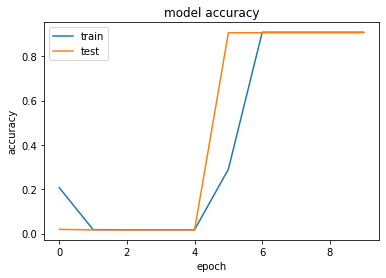

In [45]:
# accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

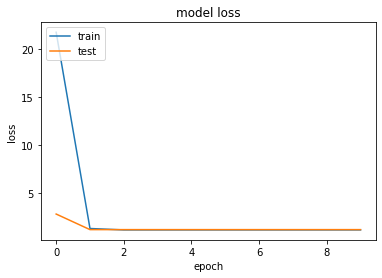

In [46]:
# loss value
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()